In [4]:
import requests
import json
import pandas as pd
import numpy as np
import random
import datetime

#Get list of names to populate database
namesDf = pd.read_csv('baby-names (1).csv')
namesDf = namesDf['name'][:1000]

In [5]:
#Gets a random credit score using a given distribution
randVals = np.random.choice(8, 1000, p=[0.02, 0.05, 0.08, 0.12, 0.15, 0.18, 0.27, 0.13])
creditScores = []

for i in randVals:
    if(i == 0):
        creditScores.append(random.randint(300,499))
    elif(i == 1):
        creditScores.append(random.randint(500,549))
    elif(i == 2):
         creditScores.append(random.randint(550,599))
    elif(i == 3):
        creditScores.append(random.randint(600,649))
    elif(i == 4):
        creditScores.append(random.randint(650,699))
    elif(i == 5):
        creditScores.append(random.randint(700,749))
    elif(i == 6):
        creditScores.append(random.randint(750,799))
    elif(i == 7):
        creditScores.append(random.randint(800,850))

len(creditScores)

1000

In [11]:
#Populates user df with customers
customerDf = pd.DataFrame(columns=["name", "creditScore"])
for i in range(1000):
    customerData = {
	    'name' : namesDf[i], 
        'creditScore' : creditScores[i],
        'averagePaymentDiff' : 0,
        'numPayments' : 0
	}
    customerDf = pd.concat([customerDf, pd.DataFrame([customerData])], ignore_index=True)

In [13]:
import radar
import datetime

billDf = pd.DataFrame(columns = ["date", "customer", "merchant", "paymentDueDate", "dateDifference"])
for i in range(10000):
    
    #Sampling random customer and merchant
    randCust = customerDf.sample()
    randMerch = customerDf.sample()
    if randCust.equals(randMerch):
        while(randCust.equals(randMerch)):
            randMerch = customerDf.sample()

    #Generating random payment due date
    paymentDueDate = radar.random_datetime(
        start = datetime.datetime(year=2023, month=1, day=1),
        stop = datetime.datetime(year=2024, month=1, day=1)
    )
    paymentDueDate = paymentDueDate.date()

    #generating random payment date
    normal_days = int(random.gauss(0, 7)) - 1
    paymentDate = paymentDueDate + datetime.timedelta(days=normal_days)
    
    dateDifference = paymentDate - paymentDueDate
    dateDifference = dateDifference.days
    
    billData = {
        'date' : paymentDate,
        'customer' : randCust.iloc[0]['name'],
        'merchant' : randMerch.iloc[0]['name'],
        'paymentDueDate' : paymentDueDate, 
        'dateDifference' : dateDifference,
    }

    billDf = pd.concat([billDf, pd.DataFrame([billData])], ignore_index=True)
billDf

,date,customer,merchant,paymentDueDate,dateDifference
0,2023-03-30,Juan,Cyrus,2023-03-28,2
1,2023-02-22,Justin,Erie,2023-03-03,-9
2,2023-08-04,Elliot,Melvin,2023-07-19,16
3,2023-08-02,Dana,Jabez,2023-07-25,8
4,2023-02-01,Rafe,Benjiman,2023-01-31,1
...,...,...,...,...,...
9995,2023-08-22,Friend,Harrie,2023-08-24,-2
9996,2023-09-11,Carroll,Francis,2023-08-28,14
9997,2023-03-25,Justus,Jones,2023-04-01,-7
9998,2023-04-08,Evert,Solon,2023-04-11,-3


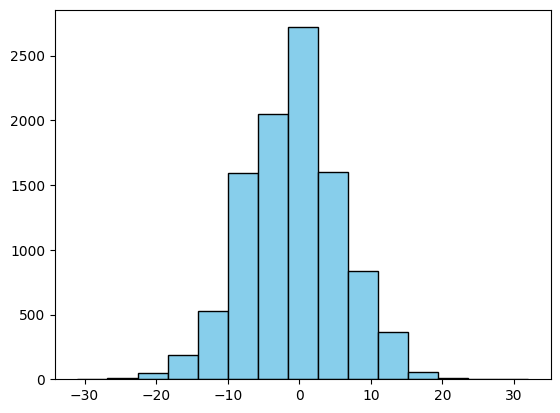

In [15]:
#display dateDiff to show distribution
import matplotlib.pyplot as plt
diffPlot = billDf['dateDifference']
plt.hist(diffPlot, bins=15, color='skyblue', edgecolor='black')
plt.show()

In [9]:
for i in billDf['customer']:
    customer = customerDf.loc[customerDf['name'] == i]
    print(customer)

      name creditScore  averagePaymentDiff  numPayments
896  Stacy         581                 0.0          0.0
       name creditScore  averagePaymentDiff  numPayments
597  Volney         576                 0.0          0.0
        name creditScore  averagePaymentDiff  numPayments
584  Garland         797                 0.0          0.0
    name creditScore  averagePaymentDiff  numPayments
46  Bert         717                 0.0          0.0
       name creditScore  averagePaymentDiff  numPayments
588  Justus         639                 0.0          0.0
        name creditScore  averagePaymentDiff  numPayments
450  Houston         714                 0.0          0.0
     name creditScore  averagePaymentDiff  numPayments
75  Homer         622                 0.0          0.0
       name creditScore  averagePaymentDiff  numPayments
462  Stuart         811                 0.0          0.0
      name creditScore  averagePaymentDiff  numPayments
535  Clair         770                 0

In [17]:
from sklearn.preprocessing import MinMaxScaler 

In [18]:
newBillDf = billDf[['dateDifference']]

In [19]:
scaler = MinMaxScaler(feature_range=(1, 5)) 

In [20]:
newBillDf[['scaledDateDifference']] = scaler.fit_transform(newBillDf[['dateDifference']]) 

/var/folders/y_/_zkv14m90_5gz3gr6tm4mn8r0000gn/T/ipykernel_93531/899241733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newBillDf[['scaledDateDifference']] = scaler.fit_transform(newBillDf[['dateDifference']])


In [21]:
newBillDf

,dateDifference,scaledDateDifference
0,2,3.095238
1,-9,2.396825
2,16,3.984127
3,8,3.476190
4,1,3.031746
...,...,...
9995,-2,2.841270
9996,14,3.857143
9997,-7,2.523810
9998,-3,2.777778


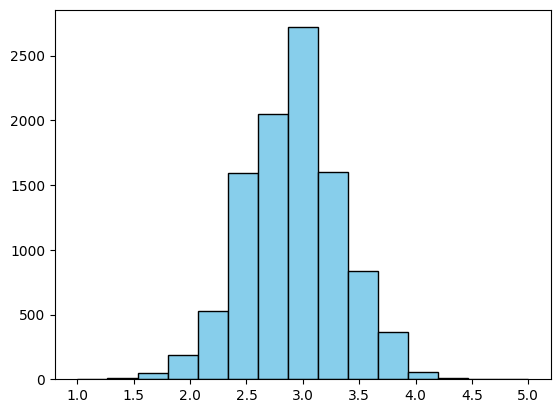

In [22]:
diffPlot1 = newBillDf['scaledDateDifference']
plt.hist(diffPlot1, bins=15, color='skyblue', edgecolor='black')
plt.show()

In [33]:
x = {
    "dateDifference": 50
}

newBillDf = pd.concat([newBillDf, pd.DataFrame([x])], ignore_index=True)

In [34]:
newBillDf[['scaledDateDifference']] = scaler.fit_transform(newBillDf[['dateDifference']]) 

In [35]:
newBillDf

,dateDifference,scaledDateDifference
0,2,3.08
1,-9,2.64
2,16,3.64
3,8,3.32
4,1,3.04
...,...,...
9998,-3,2.88
9999,7,3.28
10000,0,3.00
10001,-50,1.00
